In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

Question 1: load ranking datas

In [3]:
steel_df = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
#print (steel_df)
#print(steel_df.columns)
steel_df.columns = ["rank", "name", "park", "location", "supplier", "year_built",\
                              "points", "year_of_rank"]
#print(steel_df.columns)

In [4]:
wood_df = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
#print (wood_df)
#print(wood_df.columns)
wood_df.columns = ["rank", "name", "park", "location", "supplier", "year_built",\
                              "points", "year_of_rank"]
#print(wood_df.columns)

Here are the additional questions to section 1 that were hidden under the "Hint" section: 

How many roller coasters are included in each ranking dataset?

In [5]:
steel_name = steel_df.name.unique()
#print(len(steel_name))
#63 steel roller coasters
wood_name = wood_df.name.unique()
#print(len(wood_name)) 
#61 woods roller coasters

How many different roller coaster suppliers are included in the rankings?

In [6]:
ranking_suppliers = pd.concat([wood_df.supplier, steel_df.supplier]) 
#print(len(ranking_suppliers.unique()))
#46 unique suppliers

Do some years include more rankings than other years?

In [7]:
total_rankings = pd.merge(wood_df, steel_df, how="outer")
ranking_counts = total_rankings.groupby("year_of_rank").name.count().reset_index()
#print(ranking_counts)

If you have a favorite amusement park or there is one near where you live, subset one of the DataFrames on your chosen park. Are there any ranked roller coasters there?

Question 2: 

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

In [48]:
def single_coaster_plot (coaster_name, ranking_df, park_name):
    given_coaster = ranking_df[(ranking_df.name==coaster_name) & (ranking_df.park==park_name)]
    
    fig, ax=plt.subplots()
    ax.plot(given_coaster.year_of_rank, given_coaster["rank"])
    ax.invert_yaxis()
    plt.xlabel("Years")
    plt.ylabel("Ranks")
    plt.title ("{coaster}'s ranking".format(coaster=coaster_name))
    
    ax.set_yticks(given_coaster["rank"].values)
    
    plt.show()

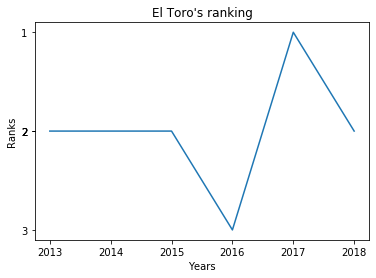

<Figure size 432x288 with 0 Axes>

In [50]:
single_coaster_plot("El Toro", wood_df, "Six Flags Great Adventure")
plt.clf()

Question 3: 

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

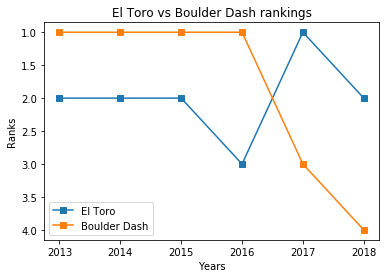

In [113]:
def two_coaster_plot (coaster_names, ranking_df, park_names):
    given_coaster1 = ranking_df[(ranking_df.name==coaster_names[0]) & (ranking_df.park==park_names[0])]
    given_coaster2 = ranking_df[(ranking_df.name==coaster_names[1]) & (ranking_df.park==park_names[1])]

    
    fig, ax=plt.subplots()
    
    ax.plot(given_coaster1.year_of_rank, given_coaster1["rank"], label=coaster_names[0], marker = "s")
    ax.plot(given_coaster2.year_of_rank, given_coaster2["rank"], label=coaster_names[1], marker = "s")
    ax.invert_yaxis()
    #ax.set_yticks(given_coaster["rank"].values) still didn't firgure out how to get rid of the decimal while also using the range\
    #of the two coasters and it can be any range. 
        
    plt.xlabel("Years")
    plt.ylabel("Ranks")
    plt.legend()
    plt.title ("{coaster1} vs {coaster2} rankings".format(coaster1=coaster_names[0], coaster2=coaster_names[1]))
    
    plt.show()

selected_names = ["El Toro","Boulder Dash"]
selected_parks = ["Six Flags Great Adventure","Lake Compounce"]

two_coaster_plot(selected_names, wood_df, selected_parks)

Question 4: 

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

Call your function with a value for n and either the wood ranking or steel ranking DataFrame.

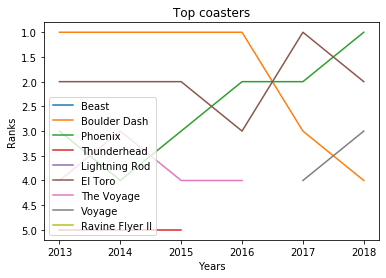

In [121]:
def many_coaster_plot (n, rankings_df):
    
    selected_coasters = rankings_df[rankings_df['rank'] <= n]
    
    fig, ax=plt.subplots()
                                 
    for coaster in set(selected_coasters['name']):
        coaster_rankings = selected_coasters[selected_coasters['name'] == coaster]
        ax.plot(coaster_rankings['year_of_rank'],coaster_rankings['rank'],label=coaster)
    
    ax.invert_yaxis()

    plt.xlabel("Years")
    plt.ylabel("Ranks")
    plt.legend()
    plt.title ("Top coasters")
    
    plt.show()



many_coaster_plot(5, wood_df)

Question 5:

Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [164]:
coasters_df = pd.read_csv("roller_coasters.csv")
print(coasters_df)
print(coasters_df.columns)

                                     name material_type seating_type  speed  \
0                                Goudurix         Steel     Sit Down   75.0   
1                           Dream catcher         Steel    Suspended   45.0   
2                              Alucinakis         Steel     Sit Down   30.0   
3                                Anaconda        Wooden     Sit Down   85.0   
4                                  Azteka         Steel     Sit Down   55.0   
...                                   ...           ...          ...    ...   
2797                     Dragon Challenge         Steel     Sit Down    NaN   
2798                           Wild Mouse         Steel     Spinning    NaN   
2799  Unnamed Atlantica Supersplash Clone         Steel     Sit Down   80.0   
2800      Unknown Duelling Launch Coaster         Steel           na    NaN   
2801                        Black Diamond         Steel     Sit Down    NaN   

      height  length  num_inversions               

Question 6:

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

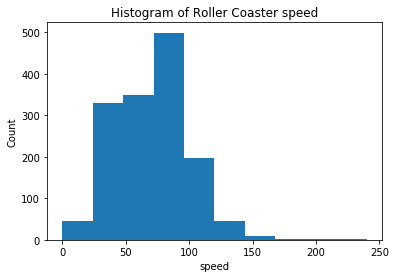

In [241]:
def histogram (column):
    if type((coasters_df[column])[0]) is str:
        print("It needs to be numeric column")
    else:
        plt.hist(coasters_df[column].dropna())
        plt.title('Histogram of Roller Coaster {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

histogram("speed")

Question 7:

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

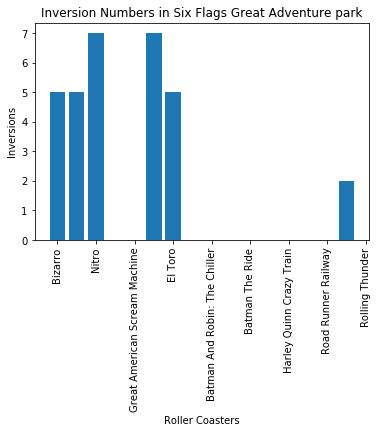

<Figure size 432x288 with 0 Axes>

In [300]:
def Inversions (df, park_name):
    selected_coasters = df[df.park == park_name]
    group_by = selected_coasters.groupby("name")["num_inversions"].sum()
    coasters_name = selected_coasters["name"]
    
    ax=plt.subplot()
    plt.bar(range(len(group_by)), group_by)
    
    ax.set_xticklabels(coasters_name.values, rotation=90)
    plt.title("Inversion Numbers in {} park".format(park_name))
    plt.xlabel("Roller Coasters")
    plt.ylabel("Inversions")

    
    plt.show()
    

    
Inversions(coasters_df, 'Six Flags Great Adventure')
plt.clf()
    

Question 8:

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

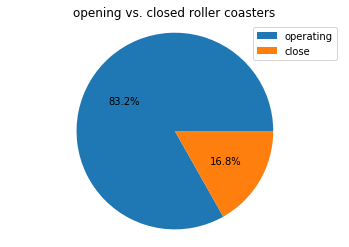

In [322]:
def status (df):
    operating_coasters = coasters_df[coasters_df["status"] == "status.operating"]
    closed_coasters = coasters_df[coasters_df["status"]=="status.closed.definitely"]
    number_operating = len(operating_coasters)
    number_closed = len(closed_coasters)
    data = [number_operating, number_closed]
    
    plt.pie(data, autopct="%0.01f%%")
    plt.title("opening vs. closed roller coasters")
    plt.legend(["operating", "close"])
    plt.axis('equal')
    
    plt.show()

    
status(coasters_df)


Question 8:

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and two-column names.

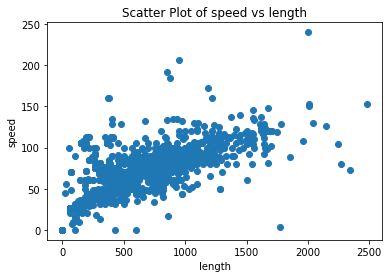

In [336]:
def scatter (df, column1, column2):
    if type((df[column1])[0]) is str or type((df[column2])[0]) is str:
        print("It needs to be numeric columns")
    else:
        plt.scatter(df[column1],df[column2])
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title("Scatter Plot of {y} vs {x}".format(y=column2, x=column1))
        
        plt.show()

scatter (coasters_df, "length", "speed")